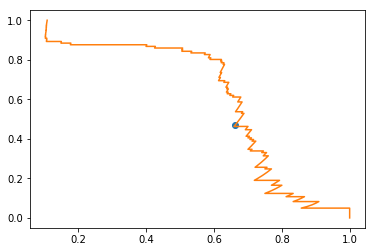

In [7]:
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from mglearn.datasets import make_blobs

import mglearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

X,y=make_blobs(n_samples=(4000,500), centers=2, cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

svc=SVC(0.05).fit(X_train,y_train)

precision, recall, thresholds = precision_recall_curve(y_test,svc.decision_function(X_test))
close_zero=np.argmin(np.abs(thresholds))

#point corresponds to minimum abs valueof threshold

plt.plot(precision[close_zero],recall[close_zero],'o')
plt.plot(precision,recall)
plt.show()

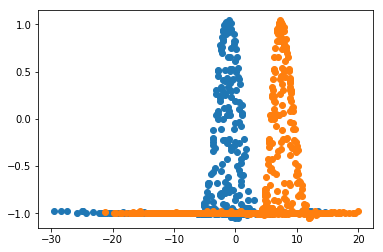

In [43]:
plt.plot(X_test,svc.decision_function(X_test),'o')

plt.show()

#decision function returns distance of the point X to the separating hyperplane

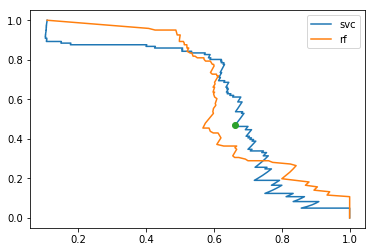

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=0,max_features=2).fit(X_train,y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.plot(precision,recall,label='svc')
plt.plot(precision_rf,recall_rf,label='rf')
plt.plot(precision[close_zero],recall[close_zero],'o')
plt.legend(loc='best')

plt.show()

In [19]:
#ROC plots false positive rate against true positive rate(recall)

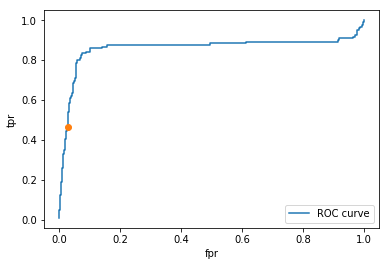

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,svc.decision_function(X_test))
plt.plot(fpr,tpr,label='ROC curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
close_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o')
plt.legend(loc=4)
plt.show()

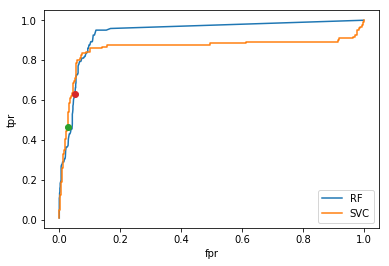

rf min threshold: 36
svc min threshold: 42.5


In [39]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('fpr')
plt.ylabel('tpr')
close_zero_rf=np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(fpr[close_zero],tpr[close_zero],'o')
plt.plot(fpr_rf[close_zero_rf],tpr_rf[close_zero_rf],'o')
plt.legend(loc=4)
plt.show()
print('rf min threshold: {}'.format(close_zero))
print('svc min threshold: {}'.format(close_zero_rf+0.5))

In [30]:
#area under curve tells us strength of model in general

In [32]:
from sklearn.metrics import roc_auc_score
rf_auc=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
svc_auc=roc_auc_score(y_test,svc.decision_function(X_test))
print('rf auc: {}'.format(rf_auc))
print('svc auc: {}'.format(svc_auc))

rf auc: 0.9366953672911658
svc auc: 0.8601544236278029


In [34]:
#AUC for model selection is much more meaningful

In [35]:
 print(svc.decision_function(X_test))

[-0.99961527  0.65359536 -0.74262072 ..., -1.00041517 -1.00041448
 -0.99986097]


In [37]:
print(rf.predict_proba(X_test))

[[ 1.    0.  ]
 [ 0.65  0.35]
 [ 0.3   0.7 ]
 ..., 
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]]


In [38]:
print(rf.predict_proba(X_test)[:10,1])

[ 0.    0.35  0.7   0.    0.    0.    0.5   0.    0.    0.  ]


NameError: name 'digits' is not defined